In [31]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import seaborn as sns

In [2]:
col = [
    'create_sh_ver',
    'step_count',
    'binning_data',
    'active_time',
    'recommendation',
    'modify_sh_ver',
    'run_step_count',
    'update_time',
    'source_package_name',
    'create_time',
    'source_info',
    'speed',
    'distance',
    'calorie',
    'walk_step_count',
    'deviceuuid',
    'pkg_name',
    'healthy_step',
    'achievement',
    'datauuid',
    'day_time',
    ''
]

사용할컬럼 = ['step_count','run_step_count', 'update_time', 'create_time','day_time']

df = pd.read_csv('/home/sjt/space/github/data_analysis/data/나의정보/com.samsung.shealth.tracker.pedometer_day_summary.20240711231920.csv', skiprows=2, names=col)
df[사용할컬럼].head()

,step_count,run_step_count,update_time,create_time
0,476,1,2022-09-13 16:11:01.662,2022-09-13 07:33:36.855
1,421,1,2022-09-14 15:09:16.486,2022-09-13 07:33:36.868
2,154,0,2022-09-13 15:23:27.709,2022-09-13 15:23:27.709
3,10723,1059,2022-09-14 13:51:48.207,2022-09-13 15:38:11.200
4,8891,1019,2022-09-14 15:09:15.911,2022-09-14 15:09:15.911


In [46]:
m1 = df['update_time'] > '2024-01'
# m2 = df['run_step_count'] > 100
m_id = df['deviceuuid'] == 'VfS0qUERdZ'
m = m1 & m_id

사용할컬럼 = ['step_count','run_step_count', 'update_time', 'create_time', 'speed', 'distance', 'calorie', 'walk_step_count']

df_2024 = df[m][사용할컬럼]
df_2024['날짜']  = pd.to_datetime(df['create_time'])
df_2024['월'] = df_2024['날짜'].dt.month
df_2024['일'] = df_2024['날짜'].dt.day
df_2024['월_일'] = df_2024['날짜'].dt.strftime('%m-%d')
df_2024

,step_count,run_step_count,update_time,create_time,speed,distance,calorie,walk_step_count,날짜,월,일,월_일
1206,7788,1017,2024-01-02 12:33:54.476,2024-01-02 10:43:38.204,1.575875,6303.247600,373.77002,6771,2024-01-02 10:43:38.204,1,2,01-02
1209,23,0,2024-01-04 12:55:03.499,2024-01-04 12:55:03.499,1.500000,17.520000,0.73000,23,2024-01-04 12:55:03.499,1,4,01-04
1211,31,0,2024-01-05 12:27:57.639,2024-01-04 16:13:42.095,1.096078,22.630001,1.01000,31,2024-01-04 16:13:42.095,1,4,01-04
1213,7537,1661,2024-01-06 12:58:13.015,2024-01-06 00:48:58.418,1.715020,6434.100000,407.90015,5876,2024-01-06 00:48:58.418,1,6,01-06
1216,70,0,2024-01-07 14:55:04.424,2024-01-06 16:02:13.119,1.392675,52.910000,2.22000,70,2024-01-06 16:02:13.119,1,6,01-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,34,0,2024-07-07 13:32:52.425,2024-07-07 05:49:24.317,1.255355,25.460003,1.01000,34,2024-07-07 05:49:24.317,7,7,07-07
1593,7836,1626,2024-07-08 13:06:40.272,2024-07-08 07:04:47.696,1.692093,6786.363300,447.54053,6210,2024-07-08 07:04:47.696,7,8,07-08
1596,8291,1003,2024-07-09 14:38:31.327,2024-07-09 11:10:58.121,1.611215,6959.168000,421.57047,7288,2024-07-09 11:10:58.121,7,9,07-09
1599,30,0,2024-07-10 14:16:14.736,2024-07-10 13:55:10.446,1.557068,23.310001,0.84000,30,2024-07-10 13:55:10.446,7,10,07-10


<Axes: xlabel='월_일', ylabel='step_count'>

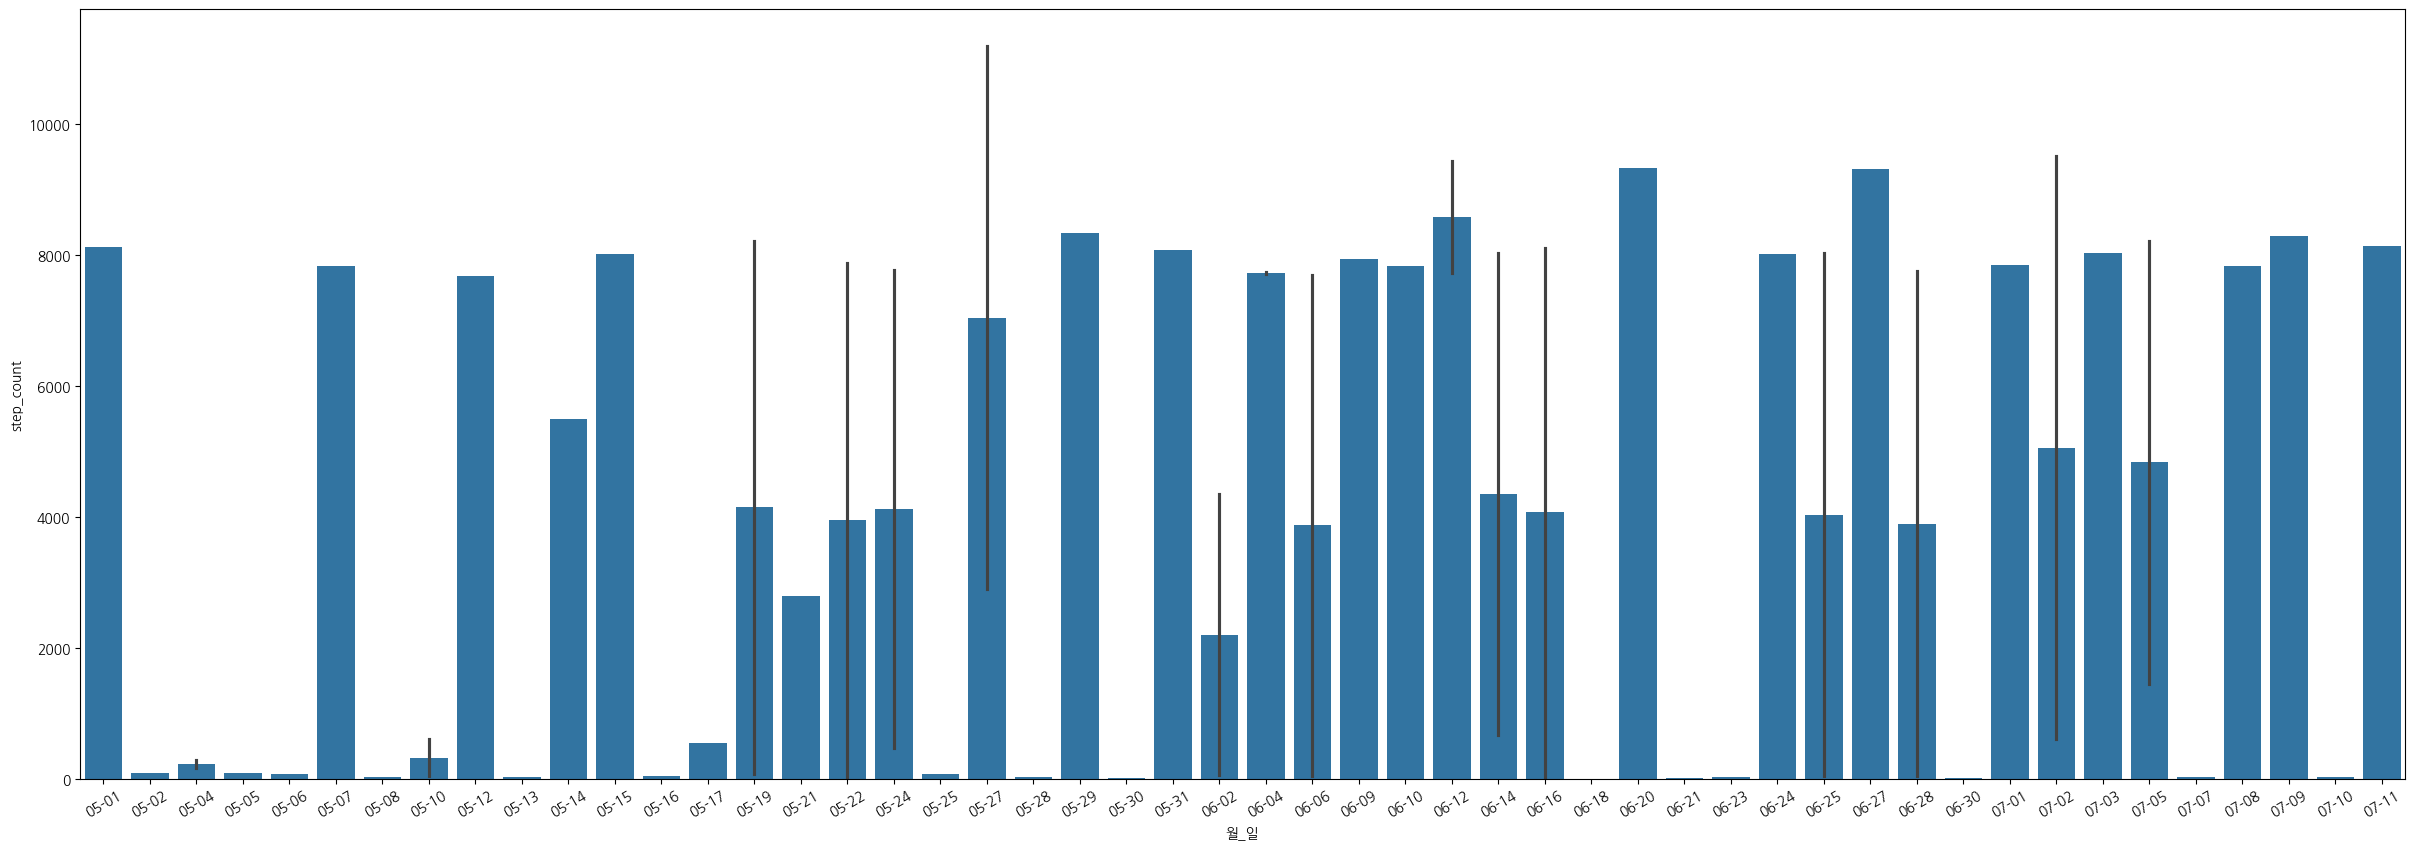

In [54]:
fig, ax = plt.subplots(
    figsize=(30,10)
)

plt.xticks(rotation=30)

sns.barplot(data=df_2024[df_2024['월'] >= 5], x='월_일', y='step_count', ax=ax)

In [10]:
Counter(df['deviceuuid'])

Counter({'VfS0qUERdZ': 619, '1I3OZTjvse': 618, 'q3oEWbd6/r': 365})

In [7]:
df.loc[1206:1209]

,create_sh_ver,step_count,binning_data,active_time,recommendation,modify_sh_ver,run_step_count,update_time,source_package_name,create_time,...,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time,
1206,62600630.0,7788,11a3168f-7d94-4789-837f-cff86f9de56c.binning_d...,3999838,6000,62600630.0,1017,2024-01-02 12:33:54.476,com.sec.android.app.shealth,2024-01-02 10:43:38.204,...,6303.2476,373.77002,6771,VfS0qUERdZ,com.sec.android.app.shealth,0,11a3168f-7d94-4789-837f-cff86f9de56c.achieveme...,11a3168f-7d94-4789-837f-cff86f9de56c,1704153600000,NaN
1207,62600630.0,7555,9fbffc96-37fd-473e-accd-ddc872fe05ee.binning_d...,3893565,6000,62600630.0,952,2024-01-02 15:00:06.252,com.sec.android.app.shealth,2024-01-02 15:00:06.252,...,6027.9400,269.40994,6603,1I3OZTjvse,com.sec.android.app.shealth,0,9fbffc96-37fd-473e-accd-ddc872fe05ee.achieveme...,9fbffc96-37fd-473e-accd-ddc872fe05ee,1704153600000,NaN
1208,62600630.0,7659,b5f7dee7-c990-452d-a7d1-69b191a4d4ea.binning_d...,3938384,6000,62600630.0,1063,2024-01-02 15:00:08.171,com.sec.android.app.shealth,2024-01-02 15:00:08.171,...,6383.0290,582.66010,6596,q3oEWbd6/r,com.sec.android.app.shealth,0,b5f7dee7-c990-452d-a7d1-69b191a4d4ea.achieveme...,b5f7dee7-c990-452d-a7d1-69b191a4d4ea,1704153600000,NaN
1209,62600630.0,23,d414c04f-9147-4799-bdb2-a8803300321a.binning_d...,11680,6000,62600630.0,0,2024-01-04 12:55:03.499,com.sec.android.app.shealth,2024-01-04 12:55:03.499,...,17.5200,0.73000,23,VfS0qUERdZ,com.sec.android.app.shealth,0,d414c04f-9147-4799-bdb2-a8803300321a.achieveme...,d414c04f-9147-4799-bdb2-a8803300321a,1704326400000,NaN


In [31]:
df[df['update_time'] > '2024-07'][사용할컬럼]

,step_count,run_step_count,update_time,create_time
1574,7849,1194,2024-07-01 13:03:33.020,2024-07-01 11:19:47.338
1575,7692,1158,2024-07-01 15:00:02.930,2024-07-01 15:00:02.930
1576,7709,1346,2024-07-01 15:00:04.154,2024-07-01 15:00:04.154
1577,9511,584,2024-07-02 15:10:43.249,2024-07-02 11:26:13.104
1578,9260,402,2024-07-02 15:10:41.277,2024-07-02 15:10:41.277
1579,9383,643,2024-07-02 15:10:42.793,2024-07-02 15:10:42.793
1580,611,8,2024-07-03 15:11:12.823,2024-07-02 16:44:52.267
1581,580,0,2024-07-03 15:00:02.960,2024-07-03 15:00:02.960
1582,8039,1504,2024-07-04 14:08:53.790,2024-07-03 15:43:03.335
1583,7772,1271,2024-07-04 15:30:03.973,2024-07-04 15:30:03.973


In [12]:
df.loc[1596:1599]

,create_sh_ver,step_count,binning_data,active_time,recommendation,modify_sh_ver,run_step_count,update_time,source_package_name,create_time,...,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time,
1596,62701610.0,8291,66426899-7e53-473e-81a6-1953a195d7df.binning_d...,4319204,6000,62701610.0,1003,2024-07-09 14:38:31.327,com.sec.android.app.shealth,2024-07-09 11:10:58.121,...,6959.168000,421.57047,7288,VfS0qUERdZ,com.sec.android.app.shealth,0,66426899-7e53-473e-81a6-1953a195d7df.achieveme...,66426899-7e53-473e-81a6-1953a195d7df,1720483200000,NaN
1597,62701610.0,7967,56b62687-b444-4481-babe-1a2464491d69.binning_d...,4211956,6000,62701610.0,845,2024-07-09 15:00:04.314,com.sec.android.app.shealth,2024-07-09 15:00:04.314,...,6299.780000,276.15997,7122,1I3OZTjvse,com.sec.android.app.shealth,0,56b62687-b444-4481-babe-1a2464491d69.achieveme...,56b62687-b444-4481-babe-1a2464491d69,1720483200000,NaN
1598,62701610.0,8069,2860e94e-0766-404b-a69c-5d3de94db5b0.binning_d...,4191459,6000,62701610.0,1269,2024-07-09 15:00:06.538,com.sec.android.app.shealth,2024-07-09 15:00:06.538,...,7393.964000,671.81130,6800,q3oEWbd6/r,com.sec.android.app.shealth,0,2860e94e-0766-404b-a69c-5d3de94db5b0.achieveme...,2860e94e-0766-404b-a69c-5d3de94db5b0,1720483200000,NaN
1599,62701610.0,30,1d0fe786-4ab4-4dfc-8864-297215a5aaae.binning_d...,14970,6000,62701610.0,0,2024-07-10 14:16:14.736,com.sec.android.app.shealth,2024-07-10 13:55:10.446,...,23.310001,0.84000,30,VfS0qUERdZ,com.sec.android.app.shealth,0,1d0fe786-4ab4-4dfc-8864-297215a5aaae.achieveme...,1d0fe786-4ab4-4dfc-8864-297215a5aaae,1720569600000,NaN
